# Imports

In [68]:
from datetime import datetime

import astropy.units as u
import numpy as np

from astropy.time import Time
from matplotlib import pyplot as plt

from sunpy.net import Fido, attrs as a

from radiospectra import net #let Fido know about the radio clients
from radiospectra.spectrogram2 import Spectrogram

# What can be searched for?

In [2]:
a.Instrument   #try .waves .swave .rstn .

Attribute Name,Client,Full Name,Description
aia,VSO,AIA,Atmospheric Imaging Assembly
bbi,VSO,BBI,None
bcs,VSO,BCS,Bragg Crystal Spectrometer
be_continuum,VSO,BE-Continuum,INAF-OACT Barra Equatoriale Continuum Instrument
be_halpha,VSO,BE-Halpha,INAF-OACT Barra Equatoriale Hα Instrument
bic_hifi,VSO,BIC-HIFI,None
bigbear,VSO,Big Bear,"Big Bear Solar Observatory, California TON and GONG+ sites"
caii,VSO,CAII,Kanzelhöhe Ca II k Instrument
cds,VSO,CDS,Coronal Diagnostic Spectrometer
celias,VSO,CELIAS,"Charge, Element, and Isotope Analysis System"


# Let look for a lot of radio data from 2017-09-02 15:00 - 18:00

In [43]:
query = Fido.search(a.Time('2017-09-02T15:00', '2017-09-02T18:00'), 
                    a.Instrument.waves | a.Instrument.rstn | a.Instrument.ecallisto | a.Instrument.swaves)

/Users/shane/.virtualenvs/stellar-sww/lib/python3.7/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


In [44]:
query

<sunpy.net.fido_factory.UnifiedResponse object at 0x125f9c9e8>
Results from 5 Providers:

2 Results from the WAVESClient:
       Start Time               End Time        Instrument Source Provider   Wavelength [2] 
                                                                                  kHz       
----------------------- ----------------------- ---------- ------ -------- -----------------
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999      WAVES   WIND     NASA    20.0 .. 1040.0
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999      WAVES   WIND     NASA 1075.0 .. 13825.0

2 Results from the RSTNClient:
       Start Time               End Time        Provider Instrument Observatory
----------------------- ----------------------- -------- ---------- -----------
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999     RSTN       RSTN   Learmonth
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999     RSTN       RSTN    San Vito

402 Results from the CALLISTOClient:
       Start Time               End Time         Provider Instrument Observatory   ID
----------------------- ----------------------- --------- ---------- ------------ ---
2017-09-02 15:00:00.000 2017-09-02 15:14:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   0
2017-09-02 15:00:00.000 2017-09-02 15:14:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   1
2017-09-02 15:15:00.000 2017-09-02 15:29:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   0
2017-09-02 15:15:00.000 2017-09-02 15:29:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   1
2017-09-02 15:30:00.000 2017-09-02 15:44:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   0
2017-09-02 15:30:00.000 2017-09-02 15:44:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   1
2017-09-02 15:45:00.000 2017-09-02 15:59:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   0
                    ...                     ...       ...        ...          ... ...
2017-09-02 16:15:00.000 2017-09-02 16:29:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 16:30:00.000 2017-09-02 16:44:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 16:45:00.000 2017-09-02 16:59:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 17:00:00.000 2017-09-02 17:14:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 17:15:00.000 2017-09-02 17:29:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 17:30:00.000 2017-09-02 17:44:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 17:45:00.000 2017-09-02 17:59:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 18:00:00.000 2017-09-02 18:14:59.999 ECALLISTO  ECALLISTO         ZSTS  59
Length = 402 rows

4 Results from the VSOClient:
       Start Time               End Time         Source  Instrument Wavelength [2] Provider Wavetype   Size     Info  
                                                                         MHz                          Mibyte          
----------------------- ----------------------- -------- ---------- -------------- -------- -------- ------- ---------
2017-09-02 00:00:00.000 2017-09-03 00:00:00.000 STEREO_A     SWAVES  0.125 .. 16.0      SSC    BROAD 3.51668 HFR ;  ; 
2017-09-02 00:00:00.000 2017-09-03 00:00:00.000 STEREO_A     SWAVES   0.01 .. 0.16      SSC    BROAD 0.53499 LFR ;  ; 
2017-09-02 00:00:00.000 2017-09-03 00:00:00.000 STEREO_A     SWAVES  0.125 .. 16.0      SSC    BROAD 3.51668 HFR ;  ; 
2017-09-02 00:00:00.000 2017-09-03 00:00:00.000 STEREO_A     SWAVES   0.01 .. 0.16      SSC    BROAD 0.53499 LFR ;  ; 

2 Results from the SWAVESClient:
       Start Time               End Time        Instrument Source Spacecraft Provider  Wavelength [2] 
                                                                                            kHz       
----------------------- ----------------------- ---------- ------ ---------- -------- ----------------
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999     SWAVES STEREO          a     NASA    10.0 .. 160.0
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999     SWAVES STEREO          a     NASA 125.0 .. 16000.0

# Many results let try WAVES and RST

* First download the the data

In [45]:
rstn_files = Fido.fetch(query['rstn'])
waves_files = Fido.fetch(query['waves'])

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

SSL error in data received
protocol: <asyncio.sslproto.SSLProtocol object at 0x126486978>
transport: <_SelectorSocketTransport fd=106 read=polling write=<idle, bufsize=0>>
Traceback (most recent call last):
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/asyncio/sslproto.py", line 526, in data_received
    ssldata, appdata = self._sslpipe.feed_ssldata(data)
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/asyncio/sslproto.py", line 207, in feed_ssldata
    self._sslobj.unwrap()
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/ssl.py", line 767, in unwrap
    return self._sslobj.shutdown()
ssl.SSLError: [SSL: KRB5_S_INIT] application data after close notify (_ssl.c:2580)
SSL error in data received
protocol: <asyncio.sslproto.SSLProtocol object at 0x126486898>
transport: <_SelectorSocketTransport fd=105 read=polling write=<idle, bufsize=0>>
Traceback (most recent call last):
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/asyncio/sslproto.py", line 526, 

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

SSL error in data received
protocol: <asyncio.sslproto.SSLProtocol object at 0x126486978>
transport: <_SelectorSocketTransport fd=110 read=polling write=<idle, bufsize=0>>
Traceback (most recent call last):
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/asyncio/sslproto.py", line 526, in data_received
    ssldata, appdata = self._sslpipe.feed_ssldata(data)
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/asyncio/sslproto.py", line 207, in feed_ssldata
    self._sslobj.unwrap()
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/ssl.py", line 767, in unwrap
    return self._sslobj.shutdown()
ssl.SSLError: [SSL: KRB5_S_INIT] application data after close notify (_ssl.c:2580)
SSL error in data received
protocol: <asyncio.sslproto.SSLProtocol object at 0x126486e80>
transport: <_SelectorSocketTransport fd=92 read=polling write=<idle, bufsize=0>>
Traceback (most recent call last):
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/asyncio/sslproto.py", line 526, i

* Load into spectrograms

In [56]:
rstn_spec = Spectrogram(sorted(rstn_files))
waves_spec = Spectrogram(sorted(waves_files))

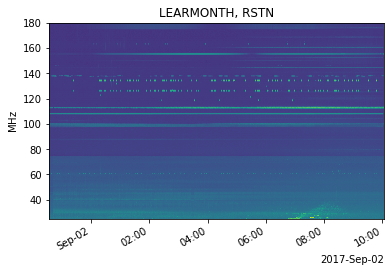

In [57]:
rstn_spec[0].plot()

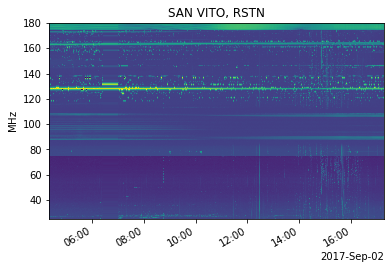

In [58]:
rstn_spec[1].plot()

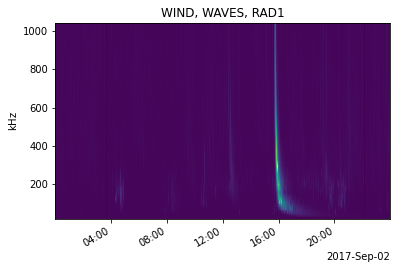

In [59]:
waves_spec[0].plot()

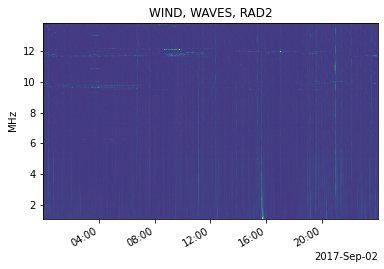

In [60]:
waves_spec[1].plot()

* Waves data looks like it captured burst let make a nice figure

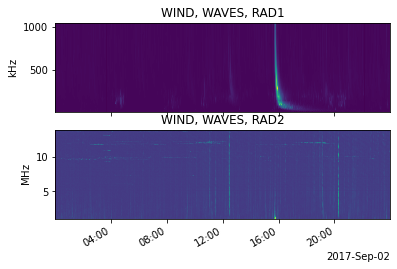

In [61]:
fig, axes = plt.subplots(2, 1, sharex=True)

waves_spec[0].plot(axes=axes[0])
waves_spec[1].plot(axes=axes[1])

(13.825, 1.075)

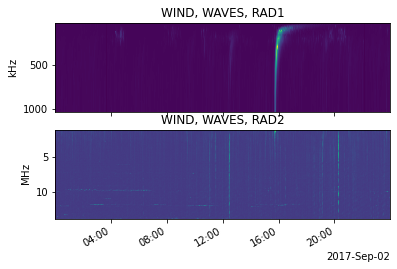

In [62]:
fig, axes = plt.subplots(2, 1, sharex=True)

waves_spec[0].plot(axes=axes[0])
waves_spec[1].plot(axes=axes[1])

# by default y-axis low to hight flip so moving away fro sun with time
axes[0].set_ylim(reversed(axes[0].get_ylim()))
axes[1].set_ylim(reversed(axes[1].get_ylim()))

#

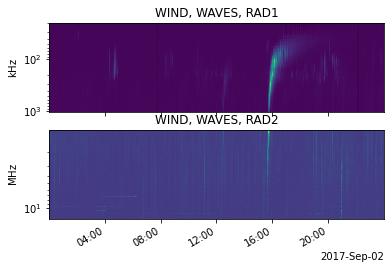

In [63]:
fig, axes = plt.subplots(2, 1, sharex=True)

waves_spec[0].plot(axes=axes[0])
waves_spec[1].plot(axes=axes[1])

# by default y-axis low to hight flip so moving away fro sun with time
axes[0].set_ylim(reversed(axes[0].get_ylim()))
axes[1].set_ylim(reversed(axes[1].get_ylim()))

# log y-axis
axes[0].set_yscale('log')
axes[1].set_yscale('log')

(17411.625, 17411.75)

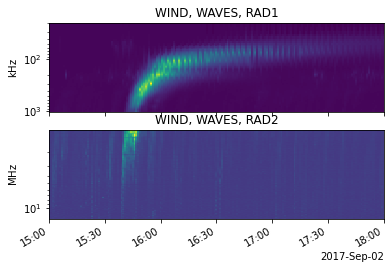

In [64]:
from datetime import datetime

fig, axes = plt.subplots(2, 1, sharex=True)

waves_spec[0].plot(axes=axes[0])
waves_spec[1].plot(axes=axes[1])

# by default y-axis low to hight flip so moving away fro sun with time
axes[0].set_ylim(reversed(axes[0].get_ylim()))
axes[1].set_ylim(reversed(axes[1].get_ylim()))

# log y-axis
axes[0].set_yscale('log')
axes[1].set_yscale('log')

axes[1].set_xlim(datetime(2017, 9, 2, 15), datetime(2017, 9, 2, 18))

In [55]:
# Find some callisto data?

In [27]:

inds = np.where((query['CALLISTO']['Start Time'] >= Time('2017-09-02 15:00')) 
& (query['CALLISTO']['End Time'] <= Time('2017-09-02 17:00')))
np.unique(query['callisto'][inds]['Observatory'])

ALASKA
ALASKA-COHOE
AUSTRIA
AUSTRIA-UNIGRAZ
BLEN5M
BLENSW
DENMARK
ESSEN
GLASGOW
...
OSRA


Start Time,End Time,Provider,Instrument,Observatory,ID
object,object,str9,str9,str16,int64
2017-09-02 15:00:00.000,2017-09-02 15:14:59.999,ECALLISTO,ECALLISTO,ALASKA-COHOE,0
2017-09-02 15:00:00.000,2017-09-02 15:14:59.999,ECALLISTO,ECALLISTO,ALASKA-COHOE,1
2017-09-02 15:15:00.000,2017-09-02 15:29:59.999,ECALLISTO,ECALLISTO,ALASKA-COHOE,0
2017-09-02 15:15:00.000,2017-09-02 15:29:59.999,ECALLISTO,ECALLISTO,ALASKA-COHOE,1
2017-09-02 15:30:00.000,2017-09-02 15:44:59.999,ECALLISTO,ECALLISTO,ALASKA-COHOE,0
2017-09-02 15:30:00.000,2017-09-02 15:44:59.999,ECALLISTO,ECALLISTO,ALASKA-COHOE,1
2017-09-02 15:45:00.000,2017-09-02 15:59:59.999,ECALLISTO,ECALLISTO,ALASKA-COHOE,0
...,...,...,...,...,...
2017-09-02 15:15:00.000,2017-09-02 15:29:59.999,ECALLISTO,ECALLISTO,ZSTS,59


# Load data not supported by Spectrogram

In [82]:
data = np.zeros((200, 200))
data[50:150, 50:150] = 1
times = Time('2017-09-02 15:00') + np.arange(200) * u.s
freqs = np.linspace(10, 20, 200) * u.GHz

# expects at least the following meta data
meta = {
    'observatory': 'some place',
    'instrument': 'an instrument',
    'detector': 'the detector',
    'freqs': freqs,
    'times': times,
    'wavelength': a.Wavelength(freqs[0], freqs[-1]),
    'start_time': times[0],
    'end_time': times[-1]
}
super_spec = Spectrogram(data, meta )

In [83]:
super_spec

<GenericSpectrogram SOME PLACE, AN INSTRUMENT, THE DETECTOR 10000000.0 kHz - 20000000.0 kHz, 2017-09-02T15:00:00.000 to 2017-09-02T15:03:19.000>

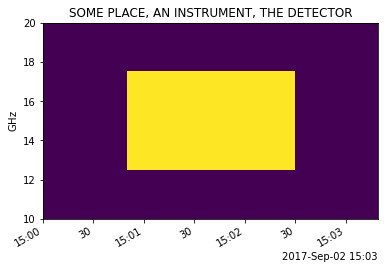

In [84]:
super_spec.plot()